## Projet Realize by : KONDJO Jacob AND FOTSO BRYAN


#### In this project we will explore a credit fraud dataset from kaggle in the goal to be able to predict which transaction is a fraud or not. The link of the dataset https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

#### Our goal 
- understand the distribution of our data
- implement many techniques to deal with imbalanced dataset 
- compared many classifier algorithm vs neural network 

#### To archive our goal we have done:


### Understand our data

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit, GridSearchCV, cross_validate
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier

In [2]:
df=pd.read_csv("..\creditcard.csv")
#afficher toutes les colonnes 
pd.set_option('display.max_columns',31)
display(df.shape)
display(df.head())

(284807, 31)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##### from the description of the dataset we know that:features V1, V2, … V28 in our dataset are the principal components obtained with PCA this is due to confidentiality issues, so they cannot provide the original features and more background information about the data, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

##### Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Preparation of data

## Check Null Values In The Dataset

In [4]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Check Duplicated lignes

In [5]:
df.duplicated().any()

True

In [6]:
df.shape

(284807, 31)

### suppress the duplicated lignes

In [7]:
df =  df.drop_duplicates()

In [8]:
df.shape

(283726, 31)

#### Summary 

- the dataset only contains numerical features and they are the principal components obtain from the PCA of the original features
- there are not any null values so we don't need to  worry about null values
- the dataset is highly unbalanced (0.172% of positive class and 99.872% of negative class)

# EDA (Exploratory Data Analysis)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

### Summary

   -the dataset only contains numerical features and they are the principal components obtain from the PCA of the original features
   
   -there are not any null values so we don't need to worry about null values
   
   -the dataset is highly unbalanced (0.172% of positive class and 99.872% of negative class

### As we can see the dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. and the negative class account for 99.827

<AxesSubplot:xlabel='Class', ylabel='count'>

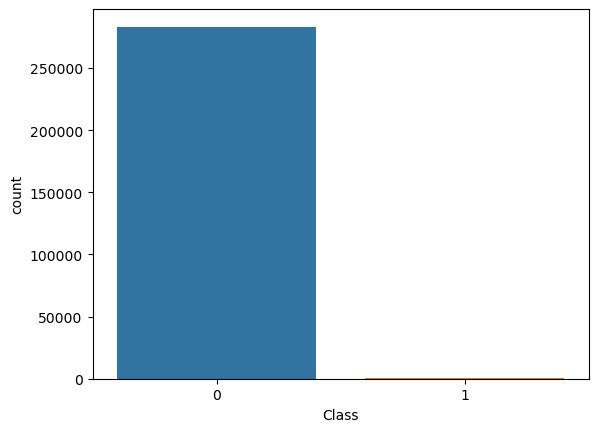

In [10]:
#proportion de fraude dans notre dataset 
sns.countplot(data=df,x='Class')

##### Notre ensemble de données original est déséquilibré : la plupart des transactions ne sont pas des fraudes. Si nous utilisons ces données pour nos modèles, ils risquent de faire beaucoup d'erreurs en supposant que la plupart des transactions sont sûres. Mais notre objectif est de détecter les fraudes, pas de faire des suppositions.

In [11]:
# separating the data for analysis
normal = df[df.Class == 0]
fraud = df[df.Class == 1]

In [12]:
print(normal.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


### statistical measures of data

In [13]:
normal.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### checking if fraudulent transaction occcur more often during certain time

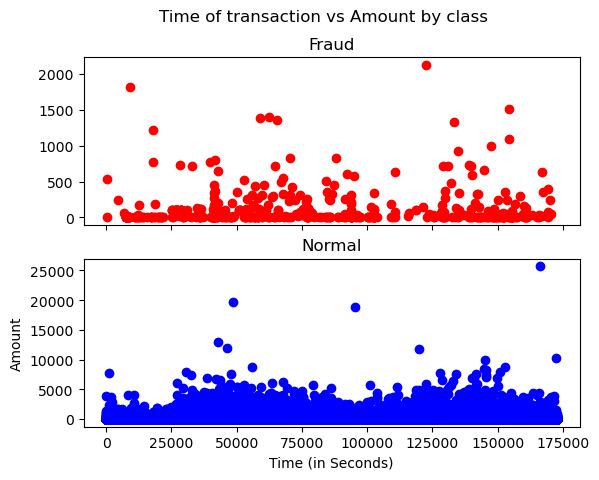

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount, color='red')
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount, color='blue')
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

## Correlation

In [16]:
cor = df.corr()
cor


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,0.031068,-0.248536,0.125500,-0.065958,-0.100316,-0.184392,0.011286,-0.073819,0.090305,0.029537,-0.051022,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,0.000815,0.001028,-0.001524,-0.000568,-0.002663,-0.000602,-0.003345,-0.003491,-0.003535,0.000919,-0.001393,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,0.000620,-0.000633,0.002266,0.000680,0.002711,0.001538,0.004013,0.003244,0.002477,-0.000358,-0.001287,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,-0.009632,0.002339,-0.005900,0.000113,-0.003027,-0.001230,-0.004430,-0.008159,-0.003495,-0.000016,-0.002269,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,0.002753,-0.001223,0.003366,0.000177,0.002801,0.000572,0.003346,0.003655,0.002325,-0.000560,0.000318,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,-0.006050,0.000411,-0.002342,0.000019,-0.001000,-0.001171,-0.002373,-0.004466,-0.002685,0.000436,-0.001185,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,-0.002180,-0.000211,-0.001185,0.000397,0.000184,-0.000470,0.000122,-0.001716,0.000541,0.000106,-0.000181,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,-0.013617,0.002454,-0.006153,-0.000170,-0.003816,-0.001394,-0.005944,-0.008794,-0.004279,0.000846,-0.001192,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,0.000481,0.004688,-0.004414,-0.001381,-0.008387,0.001044,-0.004376,-0.005576,-0.001323,-0.000626,0.000271,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,-0.012613,-0.000217,-0.002385,0.000745,0.001981,-0.000283,-0.000086,-0.002318,-0.000373,0.000247,-0.001838,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


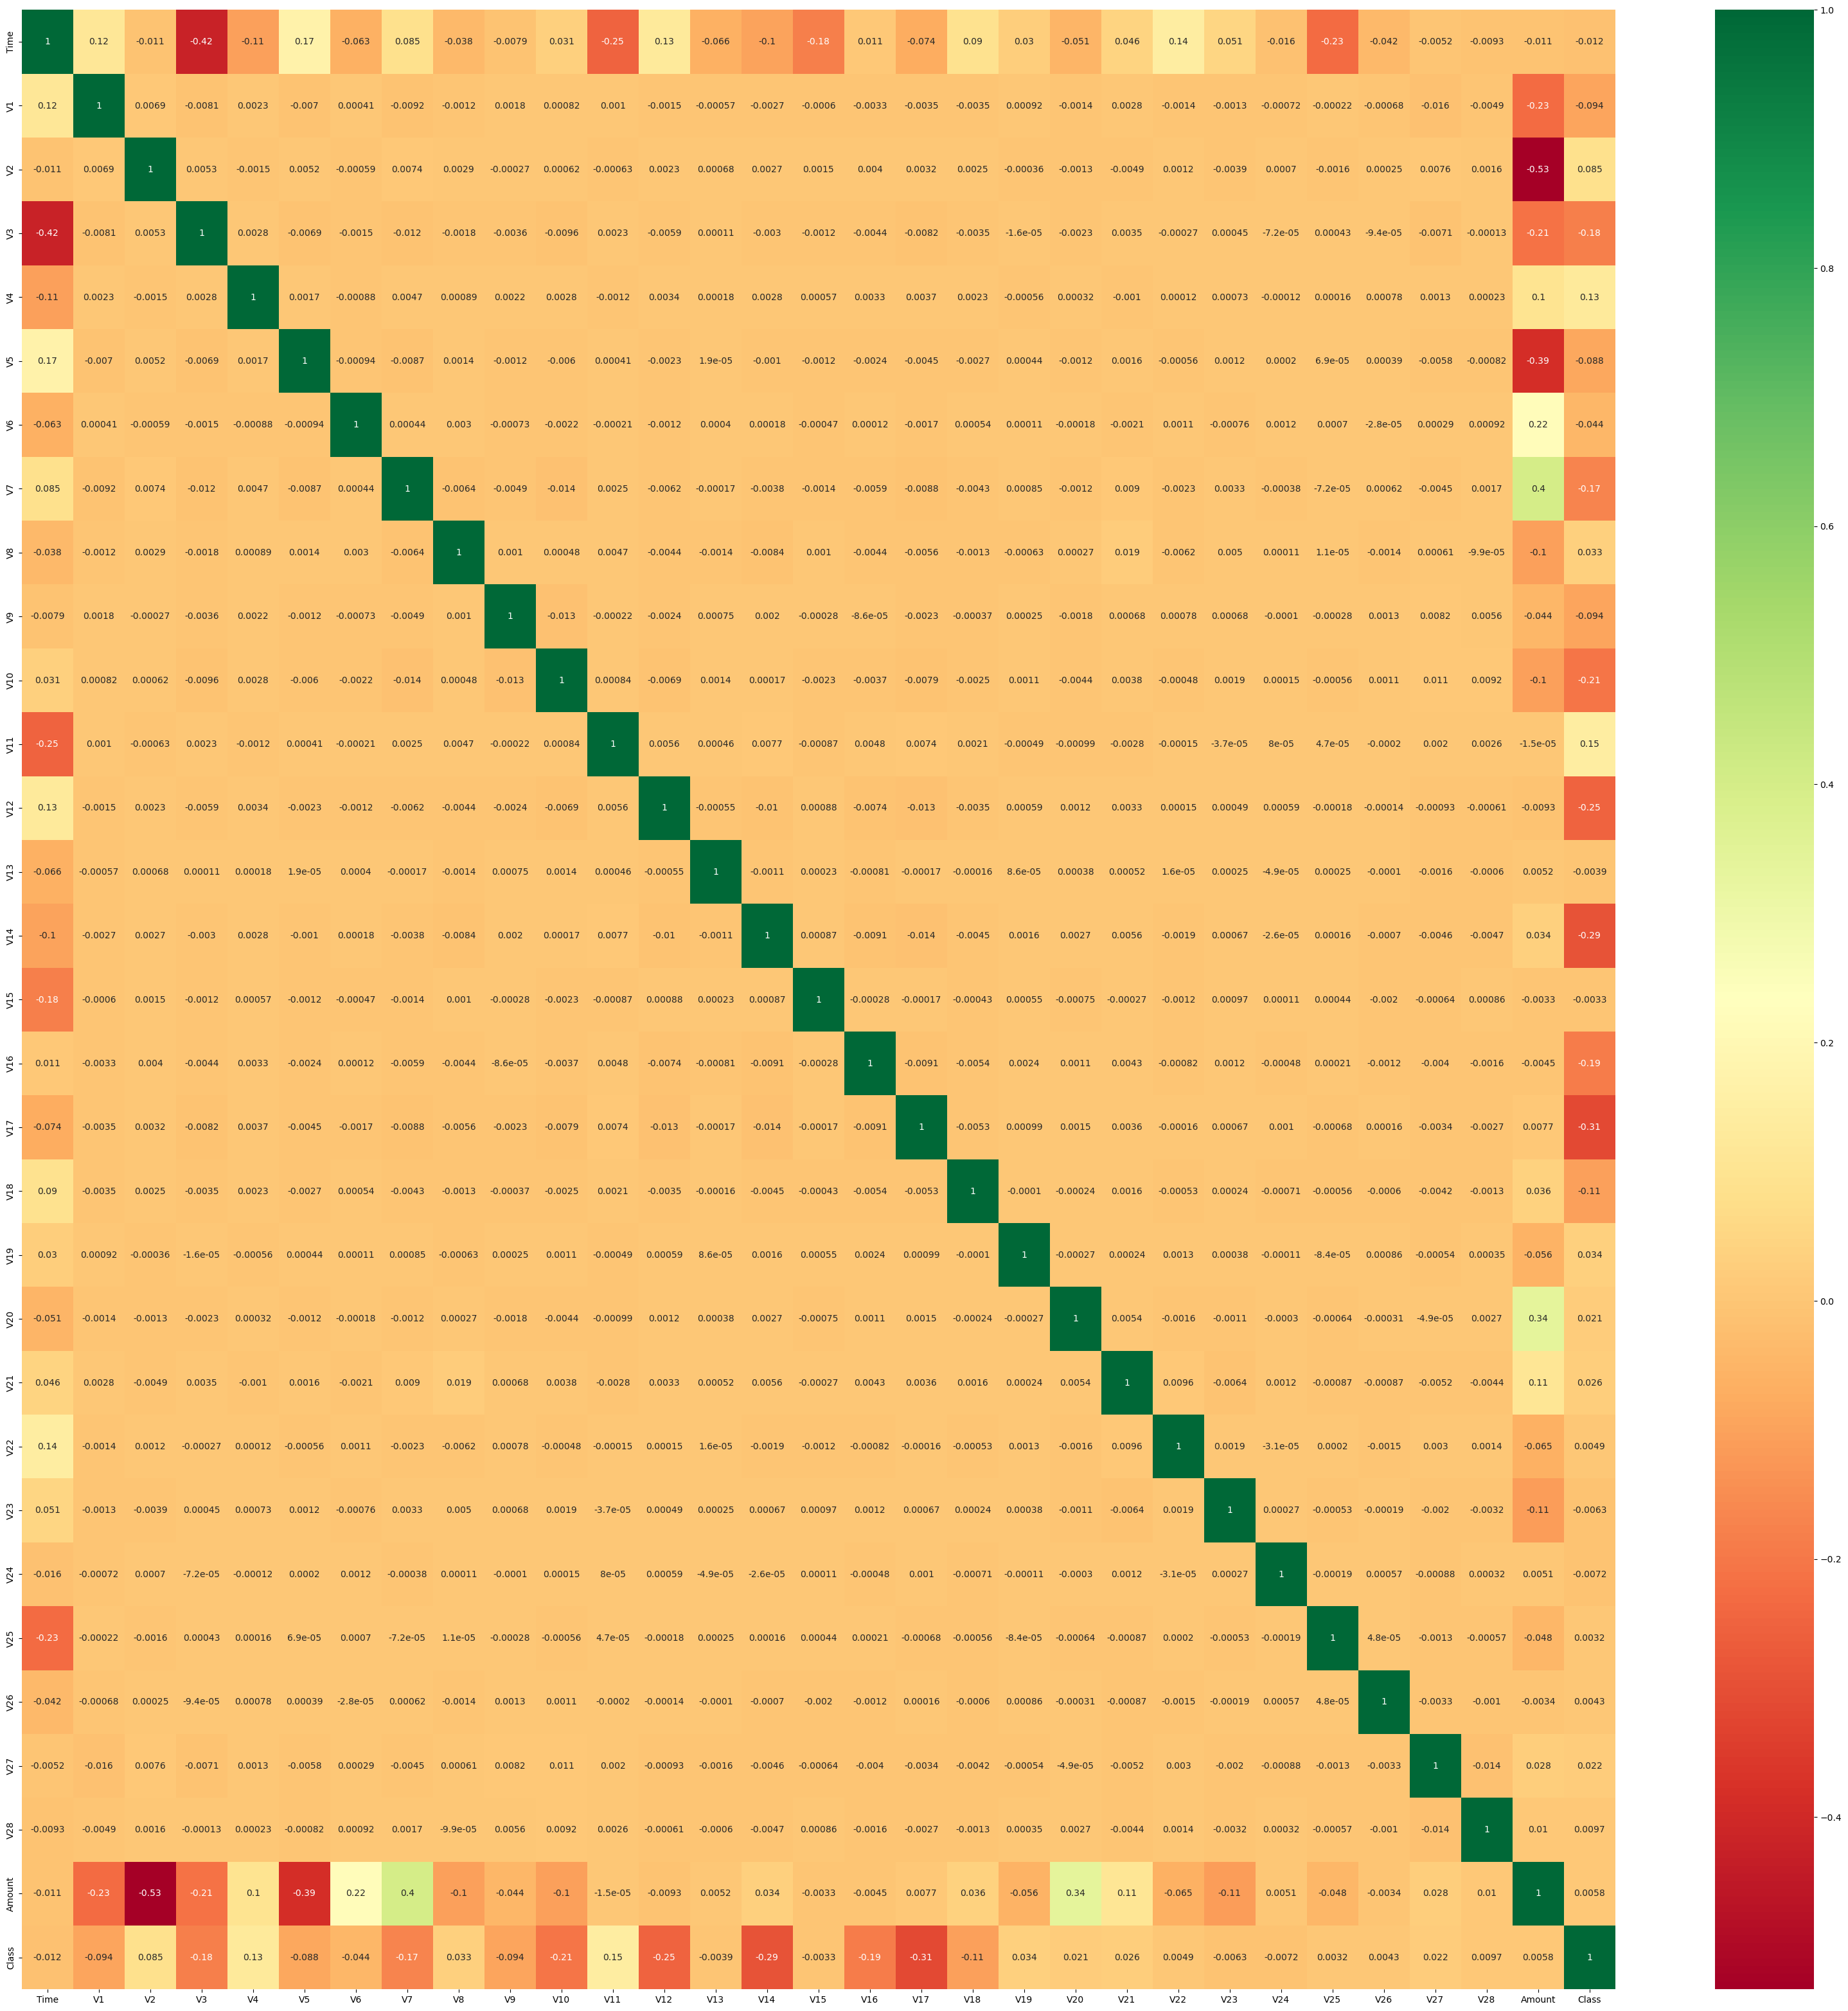

In [17]:
#plot heat map
plt.figure(figsize=(40,40))
sns.heatmap(cor,annot=True,cmap="RdYlGn")
plt.show()

In [ ]:
sns.pairplot(df)

Error in callback <function _draw_all_if_interactive at 0x000002931200D940> (for post_execute):


KeyboardInterrupt: 

In [34]:
plt.figure(figsize=(30,30))
sns.pairplot(data=df,hue='Class')

KeyboardInterrupt: 

<Figure size 3000x3000 with 0 Axes>

## DATA PREPROCESSING

In [30]:
# Préparation des données
X = df.drop('Class', axis=1)
y = df['Class']

# Division des données
ss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_index, test_index = next(ss.split(X, y))
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#### Since our dataset is highly imbalanced, we will use the oversampling technique with SMOTE

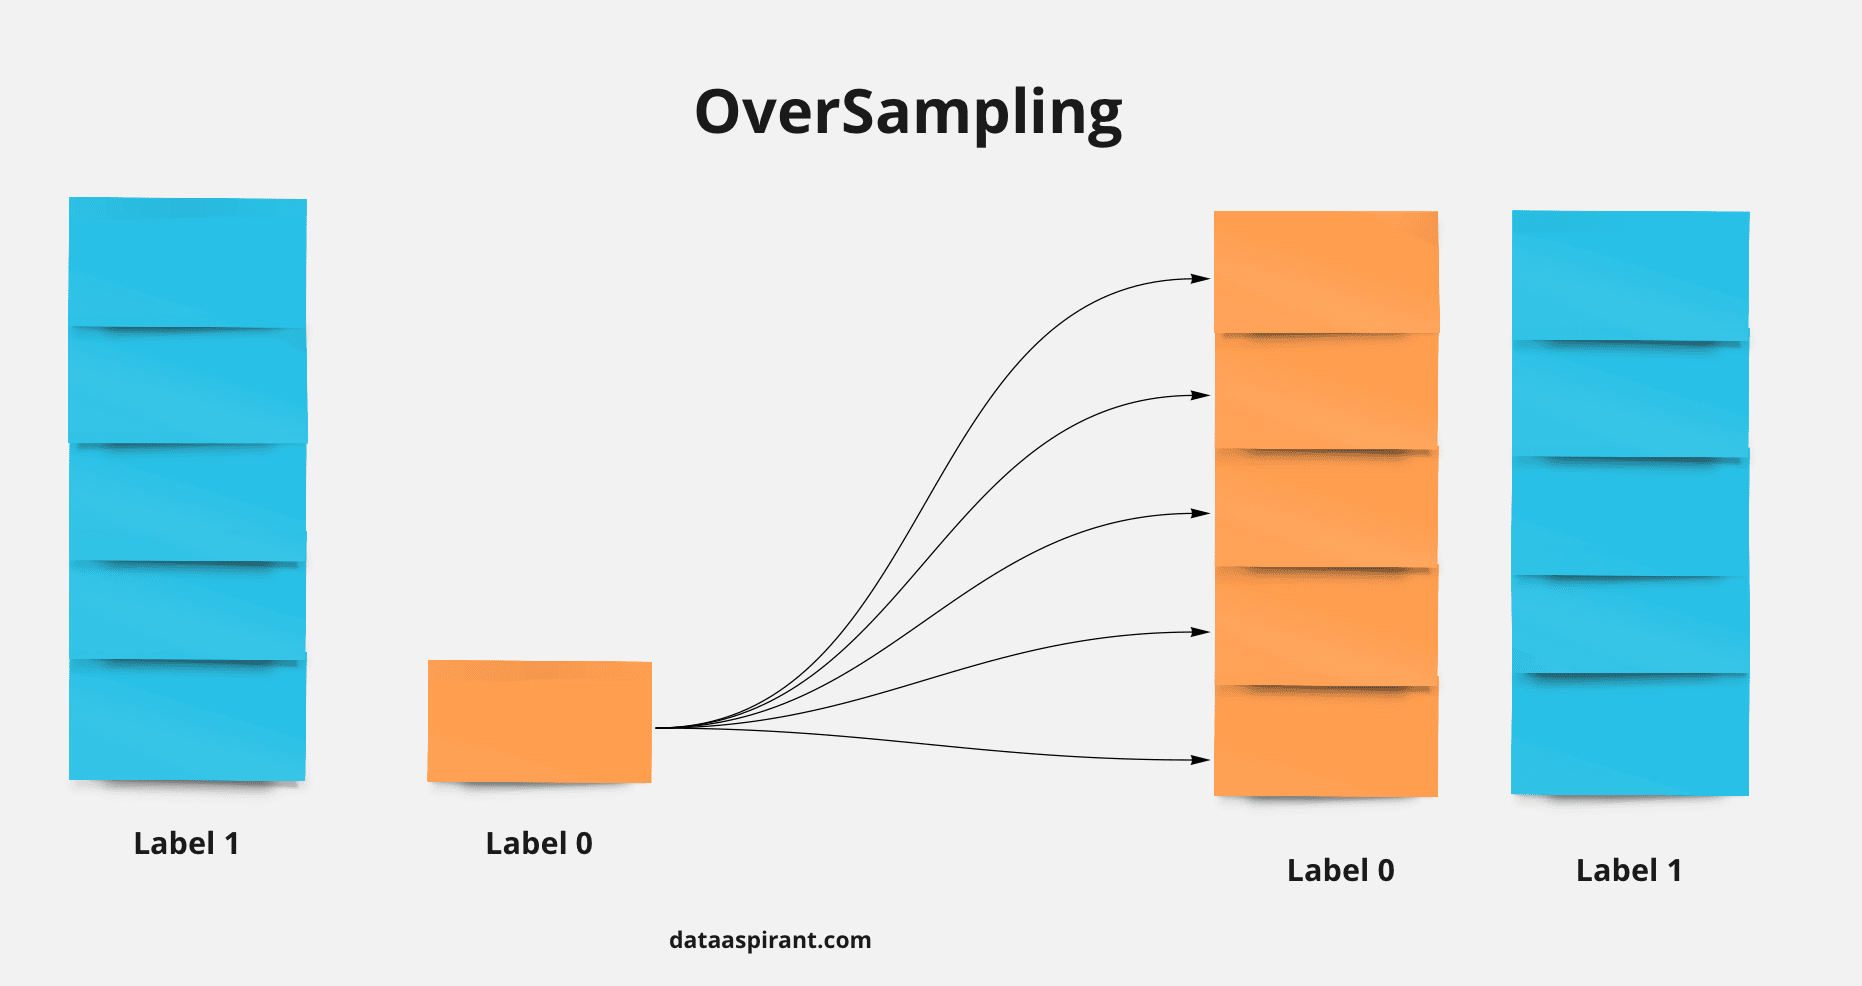 

## we will try 03 models: 
- Logistic Regression
- Decision Tree
- XGBOOST

### we will use grid search to find the best param of our model each model and the best global model among the 03 models by looking at the cross validation score

In [31]:
# Liste des modèles à entraîner
models = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
]

In [32]:
# Pipeline de prétraitement et d'entraînement
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    pipeline = ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    return pipeline

In [33]:
# Entraînement et sauvegarde des meilleurs modèles
best_estimators = [train_evaluate_model(model, X_train, y_train, X_test, y_test) for model in models]

Rapport de classification pour LogisticRegression :

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.05      0.89      0.10        90

    accuracy                           0.97     56746
   macro avg       0.53      0.93      0.54     56746
weighted avg       1.00      0.97      0.99     56746

Rapport de classification pour DecisionTreeClassifier :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.44      0.74      0.55        90

    accuracy                           1.00     56746
   macro avg       0.72      0.87      0.77     56746
weighted avg       1.00      1.00      1.00     56746

Rapport de classification pour XGBClassifier :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.82      0.80      0.81        90

    accuracy            

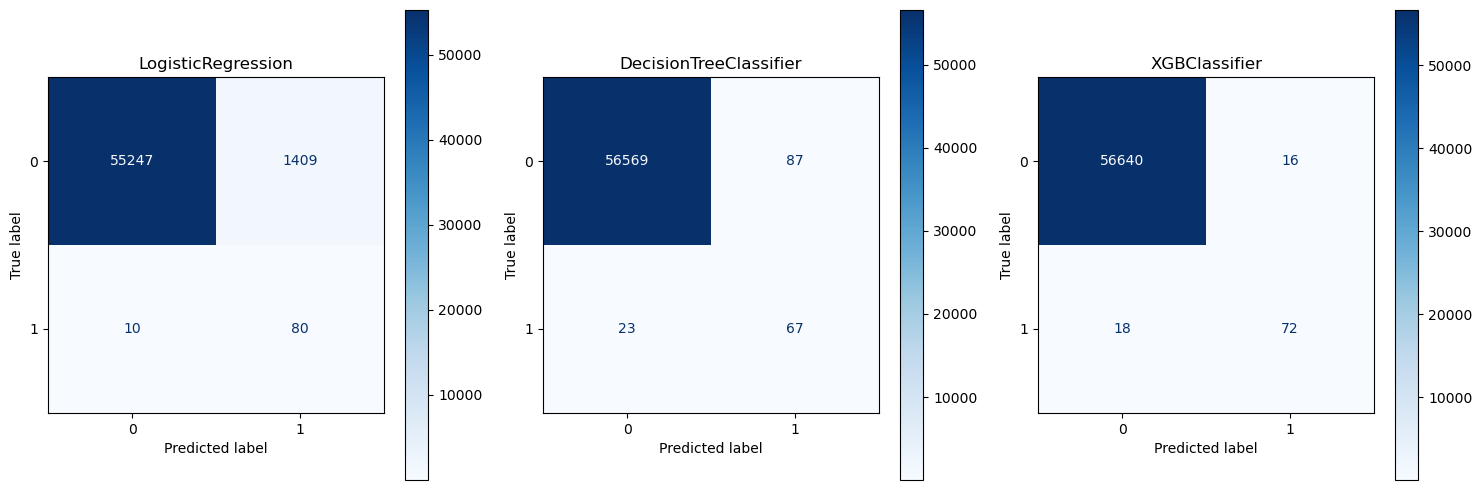

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, estimator in zip(axes, best_estimators):
    y_pred = estimator.predict(X_test)
    print(f"Rapport de classification pour {type(estimator.named_steps['classifier']).__name__} :\n")
    print(classification_report(y_test, y_pred))
    
    ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test, ax=ax, cmap='Blues')
    ax.title.set_text(type(estimator.named_steps['classifier']).__name__)

plt.tight_layout()
plt.show()

#### on se rend compte que le modèle XGBclassifier performe le mieux sur les 02 classes il parvient parfaitement à différencier les 02 classes contrairement aux autre modèle 

###  Courbe de ROC

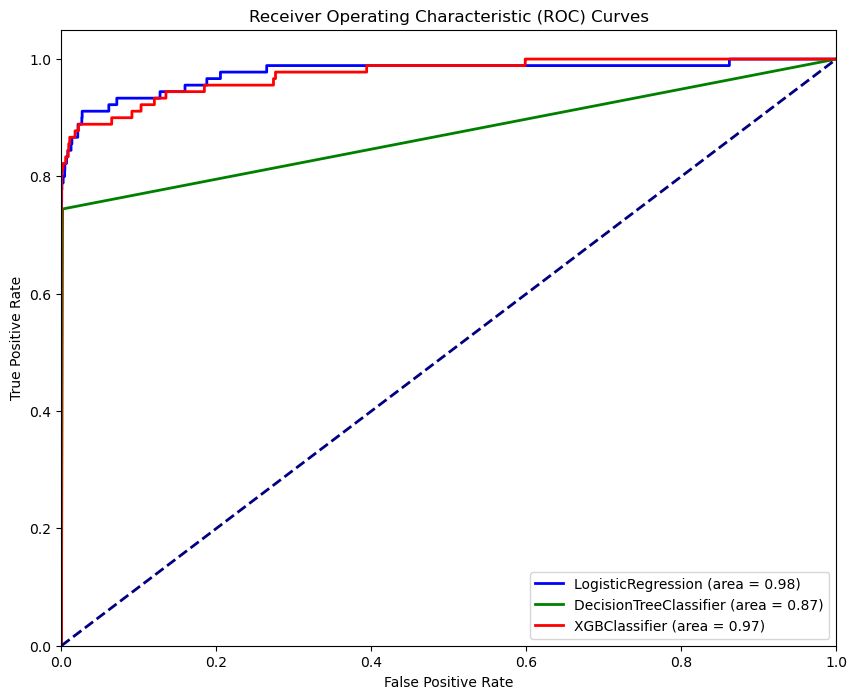

In [41]:
from sklearn.metrics import roc_curve, auc


# Préparation de la figure pour tracer
plt.figure(figsize=(10, 8))

# Couleurs pour les différentes courbes
colors = ['blue', 'green', 'red']
labels = []

# Calcul et tracé de la courbe ROC pour chaque modèle
for i, estimator in enumerate(best_estimators):
    # Obtenir les scores de probabilité pour la classe positive
    y_score = estimator.predict_proba(X_test)[:, 1]
    
    # Calculer les taux de vrais positifs et de faux positifs
    fpr, tpr, _ = roc_curve(y_test, y_score)
    
    # Calculer l'aire sous la courbe ROC
    roc_auc = auc(fpr, tpr)
    
    # Tracer la courbe ROC
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'{type(estimator.named_steps["classifier"]).__name__} (area = {roc_auc:.2f})')
    
    labels.append(type(estimator.named_steps['classifier']).__name__)

# Tracer la diagonale 50/50
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


### now we will try neural network 

In [46]:
# Configuration de base pour MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=200, random_state=42)

# Vous pouvez réutiliser le pipeline existant et simplement remplacer le modèle
# Nous allons utiliser une configuration simple pour commencer
pipeline_mlp = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', mlp)
])


In [47]:
# Entraînement du modèle
pipeline_mlp.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(100, 50, 25),
                               random_state=42))])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.78      0.72      0.75        90

    accuracy                           1.00     56746
   macro avg       0.89      0.86      0.88     56746
weighted avg       1.00      1.00      1.00     56746



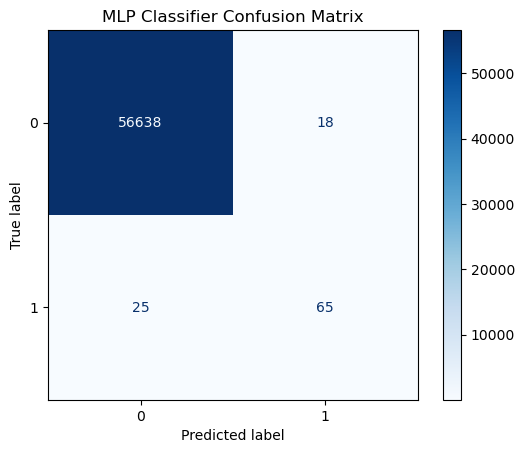

In [49]:

# Prédictions
y_pred_mlp = pipeline_mlp.predict(X_test)

# Affichage du rapport de classification
print(classification_report(y_test, y_pred_mlp))

# Affichage de la matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp, cmap='Blues')
plt.title('MLP Classifier Confusion Matrix')
plt.show()


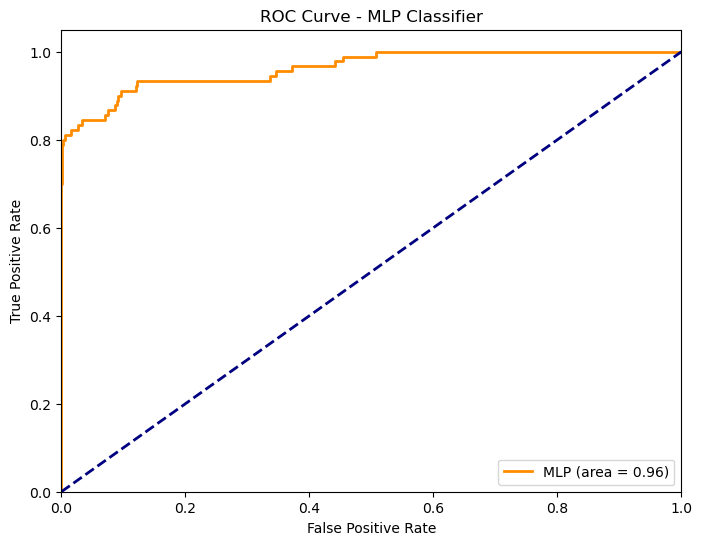

In [50]:
# Calcul des scores de probabilité
y_score_mlp = pipeline_mlp.predict_proba(X_test)[:, 1]

# Calcul des taux
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_score_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

# Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, color='darkorange', lw=2, label=f'MLP (area = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP Classifier')
plt.legend(loc="lower right")
plt.show()

### neural network has also do a great job to classif